In [ ]:
## The code below will allow optimization of hyperparameter
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

In [ ]:
# To plot neural network error against learning rate for optimization

from Chempy.neural import create_network,calculate_errors

# Now create and train the neural network for optimal hyperparameters
learning_rate = 0.003
epoch, loss = create_network(learning_rate=learning_rate)
error,std,max_err = calculate_errors('test')

In [ ]:
mean_err = np.mean(error)
std_err = np.std(error)
mean_max_err = np.mean(max_err)
print('Mean error is %.5f +/- %.5f with mean maximum %.5f' %(mean_err,std_err,mean_max_err))

In [ ]:
max_err

In [ ]:
np.max(max_err)

In [ ]:
dat=plt.hist(max_err,bins=100)

In [ ]:
from Chempy.neural import max_err_corner_plot
max_err_corner_plot('test')

In [ ]:
plt.plot(epoch,loss)

In [ ]:
sol_dat = np.load('Chempy/input/stars/Proto-sun.npy')
sol_dat = array([ ( 0.  ,  4.56),
       ( 0.06,  0.01)], 
      dtype=[('He', '<f8'),  ('age', '<f8')])

In [ ]:
sol_dat

In [ ]:
np.save('Chempy/input/stars/Proto-sun.npy',sol_dat)

In [ ]:
sol_dat.dtype.names

In [ ]:
from Chempy.wrapper import multi_star_optimization
multi_star_optimization()

In [ ]:
from Chempy.plot_mcmc import restructure_chain
restructure_chain('karakas10_neural/')


In [1]:
%pylab inline
from Chempy.parameter import ModelParameters
a = ModelParameters()

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Chempy.neural import neural_output
from Chempy.cem_function import cem_real2,posterior_function_returning_predictions,extract_parameters_and_priors
param = [-2.8,-3.06,-0.83,-0.26,0.43,0.36]
a = extract_parameters_and_priors(param,a)
a.UseNeural = False
abun,_ = cem_real2(a)

/home/philcox/anaconda3/lib/python3.6/site-packages/numpy/core/records.py:507: FutureWarning: Numpy has detected that you may be viewing or writing to an array returned by selecting multiple fields in a structured array. 

This code may break in numpy 1.13 because this will return a view instead of a copy -- see release notes for details.
  return obj.view(dtype=(self.dtype.type, obj.dtype))
/home/philcox/Chempy/Chempy/wrapper.py:160: RuntimeWarning: invalid value encountered in subtract
  abundances[element] -= abundances['Fe']


In [3]:
a = ModelParameters()
a.UseNeural = True
param = [-2.8,-3.06,-0.83,-0.26,0.43,0.36]
a = extract_parameters_and_priors(param,a)
abun2,_ = cem_real2(a)

In [4]:
print(abun)
print(abun2)

[0.0082552108621101183, 0.0069673851952920529, -2.79838027997216, -8.6890142058341127, -0.11392598297817713, -0.053688372819241437, -0.54464480548680072, -0.36368179106851706, 0.090308706122742777, -0.020057507608534308, -0.045159524441808152, 0.010474375779775613, 0.36753922488406676, 0.59041663873970629, -0.010474375779775613, 0.01345850234818613, -0.79667006694255438, -2.1396956245853644, -0.080821003273688241, 0.20030034879807435, 0.1039168965830557, 0.24055978975474002, 0.20808980267645794, 0.16423277003562564, 0.091486630948814707, -0.096872230332441411, 0.15439033319711903, -0.88288248935746294, 0.1841179743503778, -0.42600623155015782, -0.22155678592108652, 0.0020776776801785246, 0.0029699912220001821, 6.8598900802329652]
[-0.0055166868902241477, 0.0059232829177714857, 0, 0, -0.11583508573549975, -0.053845761054044816, 0, -0.36276094652153823, 0.093365176240243541, 0, -0.041362282653535573, 0.016796501815716847, 0, 0, 0, 0.019171930985706909, -0.80726627557667019, 0, -0.0825444

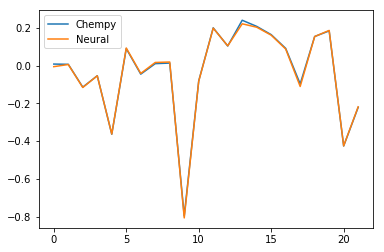

In [5]:
err = []
ab1 = []
ab2 = []
for i,item in enumerate(abun2):
    if item !=0:
        err.append(abun[i]-item)
        ab1.append(abun[i])
        ab2.append(item)
#plt.plot(range(len(err)),err)
plt.plot(range(len(ab1)),ab1,label='Chempy')
plt.plot(range(len(ab1)),ab2,label='Neural')
plt.legend()

In [ ]:
neural_output(param)

In [ ]:
a.UseNeural=False
posterior_function_returning_predictions((param,a))

In [ ]:
from Chempy.wrapper import multi_star_optimization
multi_star_optimization()
from Chempy.plot_mcmc import plot_mcmc_chain_with_prior,restructure_chain
restructure_chain('mcmc/')


In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
from Chempy.parameter import ModelParameters
a = ModelParameters()

N = a.training_size # No. data points per parameter
widths = a.training_widths # Gaussian widths for parameters	
widths = [3.,3.,3.,3.,3.,3.]

# Create 1d grid of data points equally spaced in probability space 
prob = np.linspace(1/(N+1), 1-1/(N+1), N)

In [8]:
gaussian.ppf(prob)

array([-0.96742157, -0.4307273 ,  0.        ,  0.4307273 ,  0.96742157])

In [5]:
from scipy.stats import norm as gaussian

In [13]:
prob = np.linspace(1/(N+1), 1-1/(N+1), N)
grids = [gaussian.ppf(prob) for _ in range(len(a.p0))] # Normalize to unit Gaussian
norm_grid = np.array(np.meshgrid(*grids)).T.reshape(-1,len(a.p0))

# Create grid in parameter space
param_grid = [item*widths+a.p0 for item in norm_grid]


In [14]:
param_grid

[array([-5.1922647, -5.6522647, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-5.1922647, -4.0421819, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-5.1922647, -2.75     , -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-5.1922647, -1.4578181, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-5.1922647,  0.1522647, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-3.5821819, -5.6522647, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-3.5821819, -4.0421819, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-3.5821819, -2.75     , -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-3.5821819, -1.4578181, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-3.5821819,  0.1522647, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-2.29     , -5.6522647, -3.7022647, -3.2022647, -2.3522647,
        -2.4022647]),
 array([-2

## Creating the verification dataset

In [21]:
from Chempy.parameter import ModelParameters
a = ModelParameters()
param_grid = []
%pylab inline

index=0
while index < 5:
    rand_param = np.random.normal(size = len(a.p0),loc=a.p0,scale=a.test_widths)
    #rand_param = [0.5,0.5,0.5,0.5,0.5,0.5]
    min_param = [-4,-4,-1,-1,0,0]
    max_param = [0,0,0,0,0.6,0.4]
    if all(min_param[i] < rand_param[i] for i in range(len(a.p0))) and all(max_param[i] > rand_param[i] for i in range(len(a.p0))):
           param_grid.append(rand_param)
            index += 1

Populating the interactive namespace from numpy and matplotlib
u
u
u
u
u


In [22]:
all(min_param[i] < rand_param[i] for i in range(6))

<generator object <genexpr> at 0x00000167BDC0C780>

In [ ]:



a = ModelParameters()
	names = ['verif','test'] # Two datasets
	
	for i,name in enumerate(names): # Create two identically distributed datasets
		length = a.verif_test_sizes[i]
		param_grid = []
		
		# Distribute data with prior widths
		for _ in range(length):
			param_grid.append(np.random.normal(size = len(a.p0), loc = a.p0,
									scale = a.test_widths))
			np.save("Neural/"+name+"_param_grid.npy",param_grid)
    
		model_abundances = []
		for j,jtem in enumerate(param_grid):
			abundances,_ = posterior_function_returning_predictions((jtem,a))
			model_abundances.append(abundances)
			if j%100 == 0:
				#print("Calculating %s abundance set %d of %d" %(name,j,length))
				continue
 		
 		# Save abundance table
		np.save("Neural/"+name+"_abundances.npy",model_abundances)
		